In [1]:
!pip install -q turboml-installer
import turboml_installer ; turboml_installer.install_on_colab()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.6 MB/s eta 0:00:00
📦 Installing...
🩹 Patching environment...
⏲ Done in 0:02:02
🔁 Restarting kernel...


In [1]:
import turboml as tb
tb.init(backend_url="https://organic-turkey.api.turboml.online", api_key="tb_EVuVL2gdjb362UZiaJbgeuQtMBqwTqf0_299d9cac")

In [51]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv("/content/alzheimers_prediction_dataset.csv")

In [53]:
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimers', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor', 'Social Engagement Level', 'Income Level',
       'Stress Levels', 'Urban vs Rural Living', 'Alzheimers Diagnosis'],
      dtype='object')

In [54]:
# Split into features and labels
features_df = df.drop(columns=['Alzheimers Diagnosis'])  # Exclude the target column
labels_df = df[['Alzheimers Diagnosis']]  # Only the target column


In [55]:

# Rename for consistency

labels_df = labels_df.rename(columns={'Alzheimers Diagnosis': 'label'})



In [56]:
features_df = features_df.reset_index()
labels_df = labels_df.reset_index()

In [57]:
features_df.head()

,index,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,...,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor,Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living
0,0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,...,Poor,Healthy,High,Retired,Single,No,Low,Medium,High,Urban
1,1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,...,Good,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban
2,2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,...,Good,Average,Medium,Employed,Single,No,Low,Medium,High,Rural
3,3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,...,Average,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural
4,4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,...,Poor,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural


In [58]:
labels_df.head(5)

,index,label
0,0,No
1,1,No
2,2,No
3,3,No
4,4,No


We can now upload these dataframes to the TurboML platform, the **OnlineDataset** class can be used here. It takes in the dataframe, the primary key,  and the name of the dataset that is to be created for the given dataframe as input.

In [59]:
# Assuming 'label' is a categorical column with values like 'Yes' and 'No'
labels_df['label'] = labels_df['label'].map({'Yes': 1, 'No': 0})


In [60]:
labels_df.head()

,index,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [61]:
# Rename columns to match TurboML naming conventions
features_df.columns = features_df.columns.str.replace(" ", "_")
labels_df.columns = labels_df.columns.str.replace(" ", "_")




In [62]:
# Attempt to create and upload dataset
# Upload datasets
features = tb.OnlineDataset.from_pd(
    id="qss_features_df",
    df=features_df,
    key_field="index",
    load_if_exists=True,
)
labels = tb.OnlineDataset.from_pd(
    id="qss_features_df_labels",
    df=labels_df,
    key_field="index",
    load_if_exists=True,
)

In [63]:
# transactions.feature_engineering.create_sql_features(
#     sql_definition='"transactionAmount" + "localHour"',
#     new_feature_name="my_sql_feat",
# )

# Health Risk Score (Summation of Risk Factors)
features.feature_engineering.create_sql_features(
    sql_definition='CASE WHEN "BMI" BETWEEN 18.5 AND 24.9 THEN 0 WHEN "BMI" BETWEEN 25 AND 30 THEN 1 ELSE 2 END + CASE "Smoking_Status" WHEN \'Never\' THEN 0 WHEN \'Former\' THEN 1 ELSE 2 END + CASE "Alcohol_Consumption" WHEN \'Never\' THEN 0 WHEN \'Occasionally\' THEN 1 ELSE 2 END + CASE "Diabetes" WHEN \'No\' THEN 0 ELSE 1 END + CASE "Hypertension" WHEN \'No\' THEN 0 ELSE 1 END + CASE "Cholesterol_Level" WHEN \'Normal\' THEN 0 ELSE 1 END + CASE "Genetic_Risk_Factor" WHEN \'No\' THEN 0 ELSE 1 END',
    new_feature_name="health_risk_score",
)


ValueError: Feature 'health_risk_score' already exists

In [64]:
# Lifestyle Index (Summation of Lifestyle Factors)
features.feature_engineering.create_sql_features(
    sql_definition='CASE "Physical_Activity_Level" WHEN \'High\' THEN 0 WHEN \'Medium\' THEN 1 ELSE 2 END - (CASE "Smoking_Status" WHEN \'Never\' THEN 0 WHEN \'Former\' THEN 1 ELSE 2 END + CASE "Alcohol_Consumption" WHEN \'Never\' THEN 0 WHEN \'Occasionally\' THEN 1 ELSE 2 END)',
    new_feature_name="lifestyle_index",
)

ValueError: Feature 'lifestyle_index' already exists

In [ ]:
# # Social Support Score (Summation of Social & Economic Factors)
features.feature_engineering.create_sql_features(
    sql_definition='CASE "Marital_Status" WHEN \'Single\' THEN 1 WHEN \'Widowed\' THEN 2 ELSE 0 END + CASE "Social_Engagement_Level" WHEN \'Low\' THEN 0 WHEN \'Medium\' THEN 1 ELSE 2 END + CASE "Income_Level" WHEN \'Low\' THEN 0 WHEN \'Medium\' THEN 1 ELSE 2 END + CASE "Employment_Status" WHEN \'Retired\' THEN 0 WHEN \'Unemployed\' THEN 2 ELSE 1 END',
    new_feature_name="social_support_score",
)

In [ ]:
# Cognitive Health Score (Influence of Cognitive & Mental Health Factors)
features.feature_engineering.create_sql_features(
    sql_definition='CASE WHEN "Cognitive_Test_Score" BETWEEN 30 AND 50 THEN 0 WHEN "Cognitive_Test_Score" BETWEEN 51 AND 70 THEN 1 ELSE 2 END - (CASE "Depression_Level" WHEN \'Low\' THEN 0 WHEN \'Medium\' THEN 1 ELSE 2 END + CASE "Stress_Levels" WHEN \'Low\' THEN 0 WHEN \'Medium\' THEN 1 ELSE 2 END)',
    new_feature_name="cognitive_health_score",
)


In [ ]:
# Environmental Exposure Score (Air Pollution & Urban Living Impact)
features.feature_engineering.create_sql_features(
    sql_definition='CASE "Air_Pollution_Exposure" WHEN \'Low\' THEN 0 WHEN \'Medium\' THEN 1 ELSE 2 END + CASE "Urban_vs_Rural_Living" WHEN \'Urban\' THEN 1 ELSE 0 END',
    new_feature_name="environmental_exposure_score",
)

In [ ]:
# Sleep & Mental Wellness Score
features.feature_engineering.create_sql_features(
    sql_definition='CASE "Sleep_Quality" WHEN \'Good\' THEN 0 WHEN \'Average\' THEN 1 ELSE 2 END - (CASE "Stress_Levels" WHEN \'Low\' THEN 0 WHEN \'Medium\' THEN 1 ELSE 2 END + CASE "Depression_Level" WHEN \'Low\' THEN 0 WHEN \'Medium\' THEN 1 ELSE 2 END)',
    new_feature_name="sleep_mental_wellness_score",
)

In [65]:
features.feature_engineering.get_local_features()

,index,Country,Age,Gender,Education_Level,BMI,Physical_Activity_Level,Smoking_Status,Alcohol_Consumption,Diabetes,...,Social_Engagement_Level,Income_Level,Stress_Levels,Urban_vs_Rural_Living,health_risk_score,lifestyle_index,social_support_score,cognitive_health_score,environmental_exposure_score,sleep_mental_wellness_score
0,0,Spain,90,Male,1.0,33.0,Medium,Never,Occasionally,No,...,Low,Medium,High,Urban,3,0,2,0,3,0
1,3,China,53,Male,17.0,31.2,Low,Never,Regularly,Yes,...,High,Medium,Low,Rural,5,0,4,1,1,0
2,4,Sweden,58,Female,3.0,30.0,High,Former,Never,Yes,...,Low,Medium,High,Rural,3,-1,2,-4,2,-2
3,7,China,67,Female,11.0,23.6,Low,Current,Regularly,No,...,Low,Medium,High,Urban,5,-2,5,-2,1,-2
4,10,Sweden,80,Female,2.0,31.6,Medium,Current,Never,No,...,High,High,Low,Rural,5,-1,8,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22950,22937,Italy,54,Female,3.0,28.3,High,Never,Regularly,Yes,...,Medium,High,Low,Urban,5,-2,7,0,3,1
22951,22940,Brazil,82,Female,6.0,25.4,Low,Current,Never,No,...,Low,Medium,High,Urban,4,0,3,-3,3,-4
22952,22942,USA,57,Male,5.0,28.1,Low,Former,Never,No,...,High,Medium,Low,Rural,2,1,5,-1,1,1
22953,22946,Russia,54,Female,7.0,26.8,Low,Current,Occasionally,No,...,High,Medium,Medium,Rural,5,-1,7,-2,0,-2


In [26]:

# Submit all the created features for continuous computation
features.feature_engineering.materialize_features([
    "health_risk_score",
    "lifestyle_index",
    "social_support_score",
    "cognitive_health_score",
    "environmental_exposure_score",
    "sleep_mental_wellness_score"
])




In [66]:
# Retrieve the materialized features
df_features = features.feature_engineering.get_materialized_features()
df_features

,index,Country,Age,Gender,Education_Level,BMI,Physical_Activity_Level,Smoking_Status,Alcohol_Consumption,Diabetes,...,Social_Engagement_Level,Income_Level,Stress_Levels,Urban_vs_Rural_Living,health_risk_score,lifestyle_index,social_support_score,cognitive_health_score,environmental_exposure_score,sleep_mental_wellness_score
0,0,Spain,90,Male,1.0,33.0,Medium,Never,Occasionally,No,...,Low,Medium,High,Urban,3,0,2,0,3,0
1,3,China,53,Male,17.0,31.2,Low,Never,Regularly,Yes,...,High,Medium,Low,Rural,5,0,4,1,1,0
2,4,Sweden,58,Female,3.0,30.0,High,Former,Never,Yes,...,Low,Medium,High,Rural,3,-1,2,-4,2,-2
3,7,China,67,Female,11.0,23.6,Low,Current,Regularly,No,...,Low,Medium,High,Urban,5,-2,5,-2,1,-2
4,10,Sweden,80,Female,2.0,31.6,Medium,Current,Never,No,...,High,High,Low,Rural,5,-1,8,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22950,22937,Italy,54,Female,3.0,28.3,High,Never,Regularly,Yes,...,Medium,High,Low,Urban,5,-2,7,0,3,1
22951,22940,Brazil,82,Female,6.0,25.4,Low,Current,Never,No,...,Low,Medium,High,Urban,4,0,3,-3,3,-4
22952,22942,USA,57,Male,5.0,28.1,Low,Former,Never,No,...,High,Medium,Low,Rural,2,1,5,-1,1,1
22953,22946,Russia,54,Female,7.0,26.8,Low,Current,Occasionally,No,...,High,Medium,Medium,Rural,5,-1,7,-2,0,-2


In [28]:
df_features.columns

Index(['index', 'Country', 'Age', 'Gender', 'Education_Level', 'BMI',
       'Physical_Activity_Level', 'Smoking_Status', 'Alcohol_Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol_Level',
       'Family_History_of_Alzheimers', 'Cognitive_Test_Score',
       'Depression_Level', 'Sleep_Quality', 'Dietary_Habits',
       'Air_Pollution_Exposure', 'Employment_Status', 'Marital_Status',
       'Genetic_Risk_Factor', 'Social_Engagement_Level', 'Income_Level',
       'Stress_Levels', 'Urban_vs_Rural_Living', 'health_risk_score',
       'lifestyle_index', 'social_support_score', 'cognitive_health_score',
       'environmental_exposure_score', 'sleep_mental_wellness_score'],
      dtype='object')

## Supervised Learning

Let's now take an example with a supervised learning algorithm. First, let's see what algorithms are supported out of the box.

In [67]:
tb.ml_algorithms(have_labels=True)

['HoeffdingTreeClassifier',
 'HoeffdingTreeRegressor',
 'AMFClassifier',
 'AMFRegressor',
 'FFMClassifier',
 'FFMRegressor',
 'SGTClassifier',
 'SGTRegressor',
 'SNARIMAX',
 'LeveragingBaggingClassifier',
 'HeteroLeveragingBaggingClassifier',
 'AdaBoostClassifier',
 'HeteroAdaBoostClassifier',
 'RandomSampler',
 'NeuralNetwork',
 'ONN',
 'Python',
 'OVR',
 'BanditModelSelection',
 'ContextualBanditModelSelection',
 'RandomProjectionEmbedding',
 'EmbeddingModel',
 'MultinomialNB',
 'GaussianNB',
 'AdaptiveXGBoost',
 'AdaptiveLGBM',
 'LLAMAEmbedding',
 'LlamaText',
 'RestAPIClient',
 'ClipEmbedding',
 'PythonEnsembleModel',
 'GRPCClient']

We can use HoeffdingTreeClassifier to try to classify fraudulent and normal activity on the same dataset. First, we need to instantiate a model.

In [68]:
htc_model = tb.HoeffdingTreeClassifier(n_classes=2)

We can use the same numerical fields in this model as well. However, let's add some categorical fields as well.

In [69]:
categorical_fields = [
    # "Country",
    "Gender",
    "Physical_Activity_Level",
    "Smoking_Status",
    "Alcohol_Consumption",
    "Diabetes",
    "Hypertension",
    "Cholesterol_Level",
    "Family_History_of_Alzheimers",
    "Depression_Level",
    "Sleep_Quality",
    "Dietary_Habits",
    "Air_Pollution_Exposure",
    "Employment_Status",
    "Marital_Status",
    "Genetic_Risk_Factor",
    "Social_Engagement_Level",
    "Income_Level",
    "Stress_Levels",
    "Urban_vs_Rural_Living",
]
numerical_fields = [
    "Age",
    "Education_Level",
    "BMI",
    "Cognitive_Test_Score",
    "health_risk_score",
    "lifestyle_index",
    "social_support_score",
    "cognitive_health_score",
    "environmental_exposure_score",
    "sleep_mental_wellness_score"
]



In [70]:
labels_df.head()

,index,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [71]:
features = features.get_model_inputs(
    numerical_fields=numerical_fields,textual_fields=categorical_fields
)
label = labels.get_model_labels(label_field="label")

### Run Supervised ML jobs
Same as before, we can deploy this model with the **deploy** function.

In [73]:
deployed_model_htc = htc_model.deploy("demo_classifier11", input=features, labels=label)

We can now inspect the outputs.

In [74]:
outputs = deployed_model_htc.get_outputs()

INFO:turboml.common.dataloader:Yielded 5000 records (1 batches) in 1 seconds
INFO:turboml.common.dataloader:Yielded 22955 records (5 batches) in 2 seconds


In [75]:
len(outputs)

22955

In [76]:
sample_output = outputs[-1]
sample_output

{'offset': 22954,
 'record': key: "21880"
 score: 0.642699897
 class_probabilities: 0.357300073
 class_probabilities: 0.642699897
 predicted_class: 1}

We notice that since this is a classification model, we have some new attributes in the output, specifically `class_probabilities` and `predicted_class`. We also have the `score` attribute which, for classification, just shows us the probability for the last class.

### Supervised Model Endpoints
Predict API for supervised models is exactly the same as unsupervised models.

In [77]:
model_endpoints = deployed_model_htc.get_endpoints()
model_endpoints

['https://organic-turkey.api.turboml.online/model/_turboml.demo_classifier11/predict']

In [78]:
model_query_datapoint = features_df.iloc[-1].to_dict()
model_query_datapoint

{'index': 74282,
 'Country': 'Norway',
 'Age': 57,
 'Gender': 'Female',
 'Education_Level': 1,
 'BMI': 31.7,
 'Physical_Activity_Level': 'Low',
 'Smoking_Status': 'Current',
 'Alcohol_Consumption': 'Regularly',
 'Diabetes': 'No',
 'Hypertension': 'No',
 'Cholesterol_Level': 'Normal',
 'Family_History_of_Alzheimers': 'No',
 'Cognitive_Test_Score': 46,
 'Depression_Level': 'Low',
 'Sleep_Quality': 'Average',
 'Dietary_Habits': 'Average',
 'Air_Pollution_Exposure': 'Low',
 'Employment_Status': 'Unemployed',
 'Marital_Status': 'Single',
 'Genetic_Risk_Factor': 'No',
 'Social_Engagement_Level': 'Low',
 'Income_Level': 'Medium',
 'Stress_Levels': 'Medium',
 'Urban_vs_Rural_Living': 'Urban'}

In [79]:
import requests

resp = requests.post(
    model_endpoints[0], json=model_query_datapoint, headers=tb.common.api.headers
)
resp.json()

{'class_probabilities': [0.8608955144882202, 0.1391044706106186],
 'key': '74282',
 'predicted_class': 0,
 'score': 0.1391044706106186}

### Supervised Model Evaluation
Let's now evaluate our supervised ML model. The process is exactly the same as for unsupervised model evaluation.

In [80]:
deployed_model_htc.add_metric("WindowedAUC")

In [81]:
deployed_model_htc.add_metric("WindowedAccuracy")

We can use the same **get_evaluation** function to fetch the metrics for this model as well. Remember, this function retrieves the metric values present at that moment of time. So, if the number of records recieved seem low, just re-run this function.  

In [82]:
model_acc_scores = deployed_model_htc.get_evaluation("WindowedAccuracy")

In [83]:
model_auc_scores = deployed_model_htc.get_evaluation("WindowedAUC")
model_auc_scores[-1]

index: 23
metric: 1.31488752

In [84]:
import matplotlib.pyplot as plt

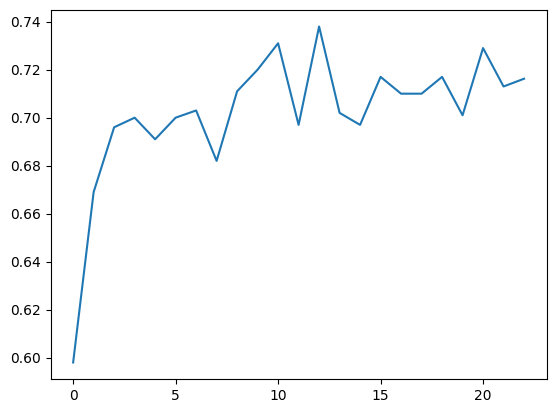

In [85]:
plt.plot([model_acc_score.metric for model_acc_score in model_acc_scores])

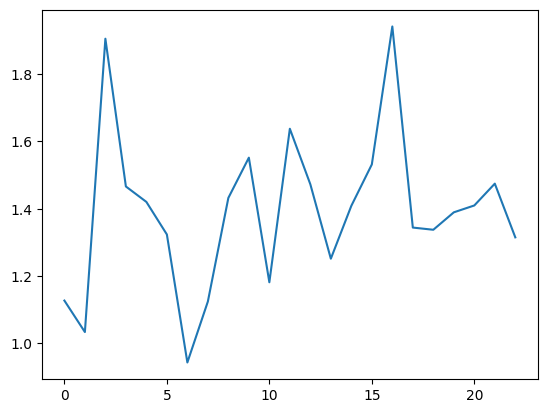

In [86]:
plt.plot([model_auc_score.metric for model_auc_score in model_auc_scores])

## Model Comparison

Now that we have 2 models deployed, and we've registered metrics for both of them, we can compare them on real-time data. On each invocation, the following function will fetch the latest evaluations of the models and plot them.

In [87]:
boosted_model = tb.AdaBoostClassifier(n_classes=2, base_model=htc_model)

In [89]:
deployed_model_boosted = boosted_model.deploy("boosted_model11", input=features, labels=label)

In [90]:
outputs = deployed_model_boosted.get_outputs()

INFO:turboml.common.dataloader:Yielded 5000 records (1 batches) in 1 seconds
INFO:turboml.common.dataloader:Yielded 22955 records (5 batches) in 2 seconds


In [91]:
lbc_model = tb.LeveragingBaggingClassifier(n_classes=2, base_model=htc_model)

In [92]:
deployed_model = lbc_model.deploy("lbc_classifier11", input=features, labels=label)

In [93]:
outputs = deployed_model.get_outputs()

INFO:turboml.common.dataloader:Yielded 5000 records (1 batches) in 2 seconds
INFO:turboml.common.dataloader:Yielded 22955 records (5 batches) in 3 seconds


In [94]:
len(outputs)

22955

In [95]:
tb.compare_model_metrics(
    models=[deployed_model_htc, deployed_model_boosted], metric="WindowedAccuracy"
)